In [6]:
import agent
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

### Environnement

In [7]:
env = gym.make('MountainCar-v0').env

### Agent

In [24]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.000001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 10,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
expected_sarsa_agent = agent.ExpectedSarsaAgent(agent_init)

### RUN

In [25]:
timesteps_per_episode = list()
rewards_per_episode = list()
epoch_size = 20
n_episode = 2000
t_max_per_episode = 200
verbose = False
graphical = False

In [26]:
assert n_episode % epoch_size == 0, f"epoch_size ({epoch_size}) must be a divisor of n_episode ({n_episode})"

for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = expected_sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        if graphical:
            env.render()
            
        state, reward, done, info = env.step(next_action)
        reward = expected_sarsa_agent.max_position_reward_function(state[0], reward)
        next_action = expected_sarsa_agent.update(state, reward, done)
        
        rewards += reward
        
        if done:
            break
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
env.close()

100%|██████████| 2000/2000 [00:31<00:00, 63.25it/s]


### ANALYSIS

In [27]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.min()

83

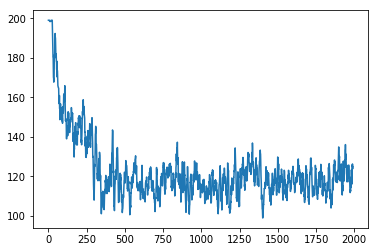

In [28]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=10)
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)

In [11]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

array([125.  , 125.45, 129.5 , 122.2 , 128.7 , 121.  , 125.25, 120.7 ,
       128.6 , 121.25, 125.25, 125.3 , 120.75, 126.25, 120.9 , 123.35,
       122.15, 126.65, 123.05, 126.75, 119.7 , 127.5 , 124.85, 132.3 ,
       122.3 , 127.9 , 128.2 , 116.95, 122.05, 122.2 , 123.55, 118.1 ,
       131.2 , 124.45, 121.35, 125.45, 117.2 , 119.45, 121.05, 132.15,
       125.6 , 128.85, 121.55, 111.6 , 125.8 , 122.9 , 125.45, 121.55,
       122.15, 122.  , 116.25, 113.55, 127.  , 118.4 , 126.  , 127.15,
       124.95, 122.8 , 119.55, 129.6 , 129.05, 120.25, 123.4 , 125.4 ,
       118.95, 125.8 , 128.45, 125.75, 117.55, 115.  , 122.65, 122.2 ,
       122.45, 122.95, 121.95, 118.2 , 118.05, 116.6 , 117.45, 123.45,
       123.55, 125.4 , 121.05, 119.15, 116.65, 122.1 , 126.1 , 111.4 ,
       120.5 , 125.4 , 112.5 , 118.9 , 115.3 , 127.4 , 121.35, 116.85,
       126.6 , 117.65, 119.25, 126.2 ])

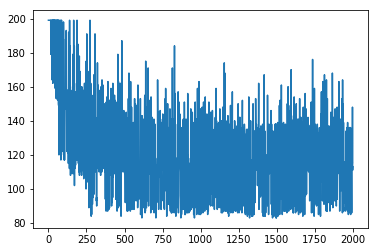

In [12]:
plt.plot(range(n_episode), timesteps_per_episode)

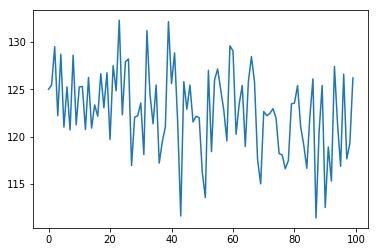

In [13]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

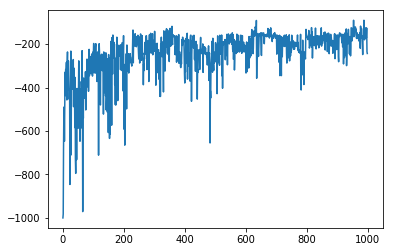

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)